This tool creates ML models with the given datasets to detect video vs. regular browsing.

In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

Our labels, separated by category.

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']


scalogram_1 = ['up_bytes_1max_y', 'up_bytes_1max_x', 'up_bytes_1min_y', 'up_bytes_1min_x',  
    'up_packet_1max_y', 'up_packet_1max_x', 'up_packet_1min_y', 'up_packet_1min_x', 'down_bytes_1max_y',
    'down_bytes_1max_x',    'down_bytes_1min_y', 'down_bytes_1min_x', 'down_packet_1max_y',
    'down_packet_1max_x', 'down_packet_1min_y', 'down_packet_1min_x']

scalogram_2 = ['up_bytes_2max_y', 'up_bytes_2max_x', 'up_bytes_2min_y', 'up_bytes_2min_x',  
    'up_packet_2max_y', 'up_packet_2max_x', 'up_packet_2min_y', 'up_packet_2min_x', 'down_bytes_2max_y',
    'down_bytes_2max_x',    'down_bytes_2min_y', 'down_bytes_2min_x', 'down_packet_2max_y',
    'down_packet_2max_x','down_packet_2min_y','down_packet_2min_x']

scalogram_3 = ['up_bytes_3max_y', 'up_bytes_3max_x', 'up_bytes_3min_y', 'up_bytes_3min_x',  
    'up_packet_3max_y', 'up_packet_3max_x', 'up_packet_3min_y', 'up_packet_3min_x', 'up_packet_3min_y',
    'down_bytes_3max_y', 'down_packet_3min_y', 'down_bytes_3max_x', 'down_bytes_3min_y',
    'down_bytes_3min_x', 'down_packet_3max_y','down_packet_3max_x','down_packet_3min_y','down_packet_3min_x']
scalogram_4 = ['up_bytes_4max_y', 'up_bytes_4max_x', 'up_bytes_4min_y', 'up_bytes_4min_x',  
    'up_packet_4max_y', 'up_packet_4max_x', 'up_packet_4min_y', 'up_packet_4min_x', 'down_bytes_4max_y',
    'down_bytes_4max_x',    'down_bytes_4min_y', 'down_bytes_4min_x', 'down_packet_4max_y',
    'down_packet_4max_x','down_packet_4min_y','down_packet_4min_x']
scalogram_5 = ['up_bytes_5max_y', 'up_bytes_5max_x', 'up_bytes_5min_y', 'up_bytes_5min_x',  
    'up_packet_5max_y', 'up_packet_5max_x', 'up_packet_5min_y', 'up_packet_5min_x', 'down_bytes_5max_y',
    'down_bytes_5max_x',    'down_bytes_5min_y', 'down_bytes_5min_x', 'down_packet_5max_y',
    'down_packet_5max_x','down_packet_5min_y','down_packet_5min_x']

scalogram = scalogram_1 + scalogram_2 + scalogram_3 + scalogram_4 + scalogram_5

Load the dataset.

In [4]:
base_folder = "csv/"
file_name = 'all_60s_1s_32.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'] + scalogram, inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90', 'up_bytes_silences',
       'up_bytes_silence_mean', 'up_bytes_longest_silence',
       'up_bytes_shortest_silence', 'up_packet_mean', 'up_packet_median',
       'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
       'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75',
       'up_packet_perc90', 'up_packet_silences', 'up_packet_longest_silence',
       'up_packet_shortest_silence', 'down_bytes_mean', 'down_bytes_median',
       'down_bytes_std', 'down_bytes_var', 'down_bytes_skew',
       'down_bytes_kurt', 'down_bytes_perc25', 'down_bytes_perc50',
       'down_bytes_perc75', 'down_bytes_perc90', 'down_bytes_silences',
       'down_bytes_silence_mean', 'down_bytes_longest_silence',
       'down_bytes_shortest_silence', 'down_packet_mean', 'down_packet_median',
 

Choose the labels to consider.

In [5]:
# Join applications from different capture settings
dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'browsing-openvpn', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'

# Video vs. Rest
dataset.loc[dataset['label'] == 'netflix', 'label'] = 'video'
dataset.loc[dataset['label'] == 'youtube', 'label'] = 'video'
dataset.loc[dataset['label'] == 'twitch', 'label'] = 'video'
dataset.loc[dataset['label'] == 'acestream', 'label'] = 'video'

dataset['label'].value_counts()

video       772
browsing    296
Name: label, dtype: int64

In [6]:
import numpy as np
browsing = dataset[dataset['label'] == 'browsing']
video = dataset[dataset['label'] == 'video']
video

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_std,down_packet_var,down_packet_skew,down_packet_kurt,down_packet_perc25,down_packet_perc50,down_packet_perc75,down_packet_perc90,down_packet_silences,label
0,-0.067448,-0.166982,0.163667,0.026787,1.333343,0.136211,-0.176799,-0.166982,-0.021187,0.250182,...,3.890668,15.137298,1.546391,0.829160,-0.406009,-0.386625,2.706207,9.955122,17.0,video
1,-0.162903,-0.176188,0.022688,0.000515,1.590660,1.502811,-0.176933,-0.176188,-0.154250,-0.131901,...,0.483122,0.233407,1.423978,0.441972,-0.406009,-0.401448,-0.028598,0.680616,22.0,video
2,-0.149275,-0.176018,0.066922,0.004479,4.300933,19.656430,-0.176933,-0.176018,-0.135642,-0.107764,...,1.574494,2.479032,4.960009,27.471672,-0.406009,-0.400308,0.621325,1.031118,22.0,video
3,-0.145777,-0.175534,0.068833,0.004738,3.177075,9.518830,-0.176602,-0.175534,-0.147003,-0.110449,...,1.866556,3.484030,3.349814,10.409506,-0.403728,-0.396887,0.272989,1.029065,14.0,video
4,-0.163854,-0.176754,0.022036,0.000486,1.353226,0.275466,-0.176933,-0.176754,-0.152799,-0.130871,...,0.505347,0.255376,1.280002,-0.154702,-0.406009,-0.403728,-0.138058,0.719383,28.0,video
5,-0.163825,-0.176688,0.022330,0.000499,1.499990,0.876502,-0.176933,-0.176688,-0.156026,-0.129400,...,0.484468,0.234709,1.310031,-0.020695,-0.406009,-0.403728,0.031834,0.749713,27.0,video
6,-0.163164,-0.176933,0.023466,0.000551,1.489869,0.947573,-0.176933,-0.176933,-0.151562,-0.128486,...,0.525939,0.276612,1.403229,0.359465,-0.406009,-0.404869,-0.173975,0.810600,30.0,video
7,-0.163926,-0.176688,0.022309,0.000498,1.671512,1.858338,-0.176933,-0.176688,-0.156249,-0.128116,...,0.508629,0.258704,1.544451,1.108262,-0.406009,-0.404869,0.056348,0.748345,30.0,video
8,-0.164161,-0.176933,0.022069,0.000487,1.424740,0.418182,-0.176933,-0.176933,-0.156606,-0.122480,...,0.519445,0.269823,1.469577,0.504464,-0.406009,-0.406009,-0.231556,0.854385,33.0,video
9,-0.163517,-0.176713,0.023190,0.000538,1.668753,1.796162,-0.176933,-0.176713,-0.155532,-0.132205,...,0.498075,0.248079,1.413566,0.431789,-0.406009,-0.403728,-0.207041,0.679704,28.0,video


Factorize the labels.

In [7]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
dataset['label'].value_counts()

0    772
1    296
Name: label, dtype: int64

Check correlation matrix.

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
down_bytes_skew                0.497497
down_bytes_kurt                0.471182
down_packet_skew               0.401021
down_packet_kurt               0.372249
up_packet_skew                 0.368316
up_packet_kurt                 0.345316
up_bytes_skew                  0.207308
up_bytes_kurt                  0.155397
up_bytes_shortest_silence      0.092058
up_packet_shortest_silence     0.092058
down_bytes_shortest_silence    0.081298
down_bytes_longest_silence     0.054358
up_packet_longest_silence      0.040531
up_bytes_longest_silence       0.040531
down_packet_var               -0.026148
down_bytes_silence_mean       -0.028746
up_bytes_silence_mean         -0.055103
down_packet_std               -0.075752
down_bytes_var                -0.092692
up_packet_var                 -0.095306
up_packet_silences            -0.102152
up_bytes_silences             -0.102152
down_packet_silences          -0.103419
down_bytes_silences           -0.103419


Imputer for Nan values.

In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

Normalize features (if needed)

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

dataset_no_label = dataset.loc[:, dataset.columns != 'label']
to_scale = dataset_no_label
scaler = StandardScaler()
scaled = scaler.fit_transform(to_scale)

dataset = pd.DataFrame(scaled)
#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')


Apply PCA

In [11]:
#PCA
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
main_components = pca.fit_transform(dataset)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels
'''

"\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=40)\nmain_components = pca.fit_transform(dataset)\ndataset = pd.DataFrame(data = main_components)\ndataset['label'] = labels\n"

In [12]:
dataset['label'] = labels

In [13]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

Split training and testing set randomly.

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [15]:
# Video vs. Video
y_train_video = (y_train == 0)
y_train_browsing = (y_train == 1)

In [16]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

import matplotlib.pyplot as plt

def do_test_forest(model):
    
    y_probas_video = cross_val_predict(model, x_train, y_train_video, cv=10, method="predict_proba")
    y_probas_browsing = cross_val_predict(model, x_train, y_train_browsing, cv=10, method="predict_proba")
    y_scores_video = y_probas_video[:, 1]
    y_scores_browsing = y_probas_browsing[:, 1]
    
    fpr_v, tpr_v, thresholds_y = roc_curve(y_train_video, y_scores_video)
    fpr_b, tpr_b, thresholds_n = roc_curve(y_train_browsing, y_scores_browsing)
    plot_roc_curve(fpr_v, tpr_v, "Video")
    plot_roc_curve(fpr_b, tpr_b, "Browsing")

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [18]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [19]:
def do_test_forest_ovo(model):

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------
	CrossValScore: 0.9414060973226501
[[161   5]
 [ 10  38]]

Accuracy train set: 0.9964871194379391
Accuracy test set: 0.9299065420560748
-----OvO Classifier Random Forest------
	CrossValScore: 0.8054735847827501
[[118  48]
 [  0  48]]

Accuracy train set: 0.8957845433255269
Accuracy test set: 0.7757009345794392
-----OvR Classifier Random Forest------
	CrossValScore: 0.8054735847827501
[[118  48]
 [  0  48]]

Accuracy train set: 0.8957845433255269
Accuracy test set: 0.7757009345794392
----------SVM-----------
	CrossValScore: 0.9049872972444792
[[163   3]
 [ 15  33]]

Accuracy train set: 0.9192037470725996
Accuracy test set: 0.9158878504672897
----------Knn-----------
	CrossValScore: 0.8744788613119665
[[163   3]
 [ 13  35]]

Accuracy train set: 0.9215456674473068
Accuracy test set: 0.9252336448598131
-----Neural Network-----
	CrossValScore: 0.9285737085531889
[[159   7]
 [  9  39]]

Accuracy train set: 0.9660421545667447
Accuracy test set: 0.9252336448598131
----

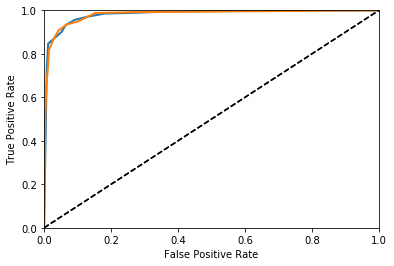

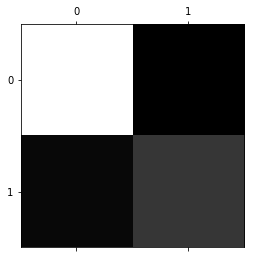

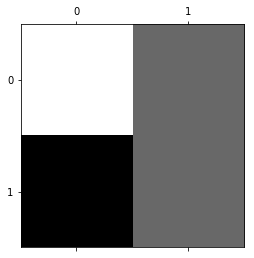

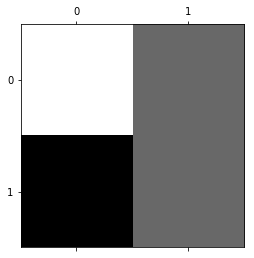

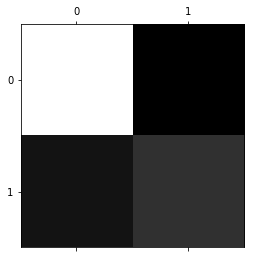

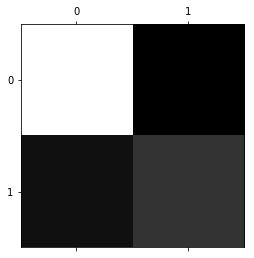

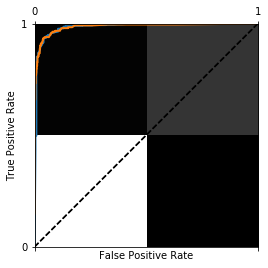

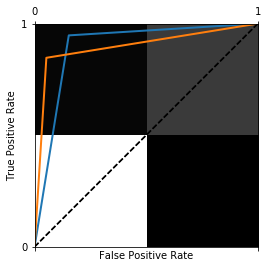

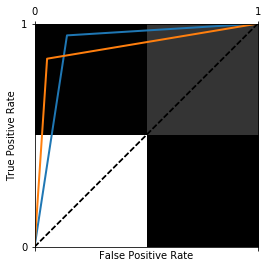

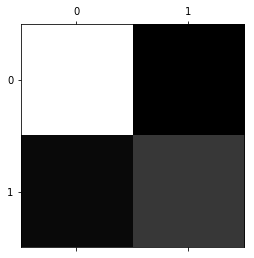

In [20]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(random_state=13)

do_test_forest(rf)

print("-----OvO Classifier Random Forest------")

rf = OneVsOneClassifier(rf)
do_test_forest_ovo(rf)

print("-----OvR Classifier Random Forest------")

rf = OneVsRestClassifier(rf)
do_test_forest_ovo(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)

print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_svm(knn)

print("-----Neural Network-----")
nn = MLPClassifier(max_iter=1000)
do_test_svm(nn)

print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)
